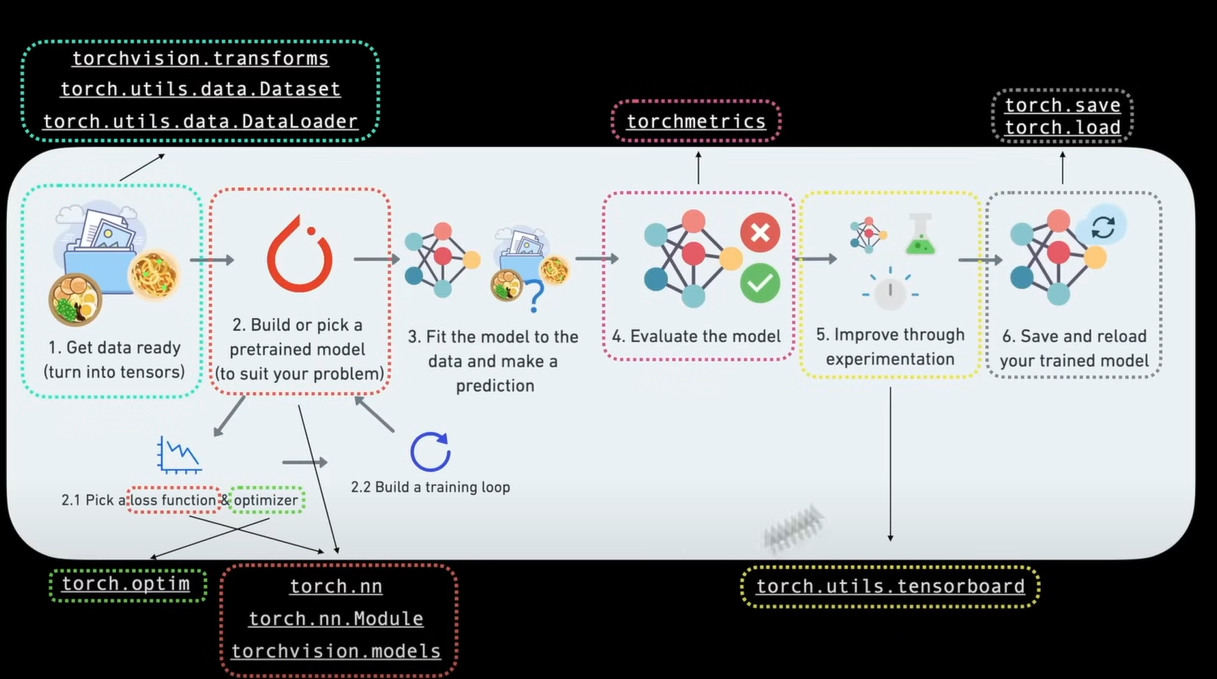

# What is a  Convolutional neural Network (CNN)?


## Computer Vision Library

* `torchvision` -  base domain library for Pytorch computer vision (main one)
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can use for your own problems
* `torchvision.transforms` - functions for manupulating your vision data (images) to be suitable for use with ML model (turns images to data)
*  `torch.utils.data.Dataset` - Create our dataset with our own custom data (Base dataset class for Pytorch)
*  `totch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets,transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


In [2]:
## Getting a dataset
# FashionMNIST 
from torchvision import datasets

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    target_transform=None
)

In [3]:
 len(training_data),len(test_data)

(60000, 10000)

In [4]:
# See the first trainig example
image,label = training_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = training_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = training_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
training_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
print(f"Image shape: {image.shape} | [color chanel, height,width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) | [color chanel, height,width]
Image label: Ankle boot


#### 1.2 Visaulzing the data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

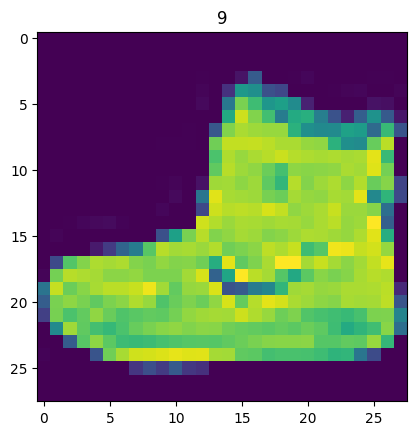

In [9]:
import matplotlib.pyplot as plt

image,label = training_data[0]

print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

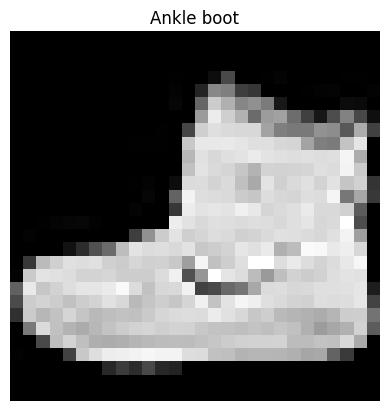

In [10]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

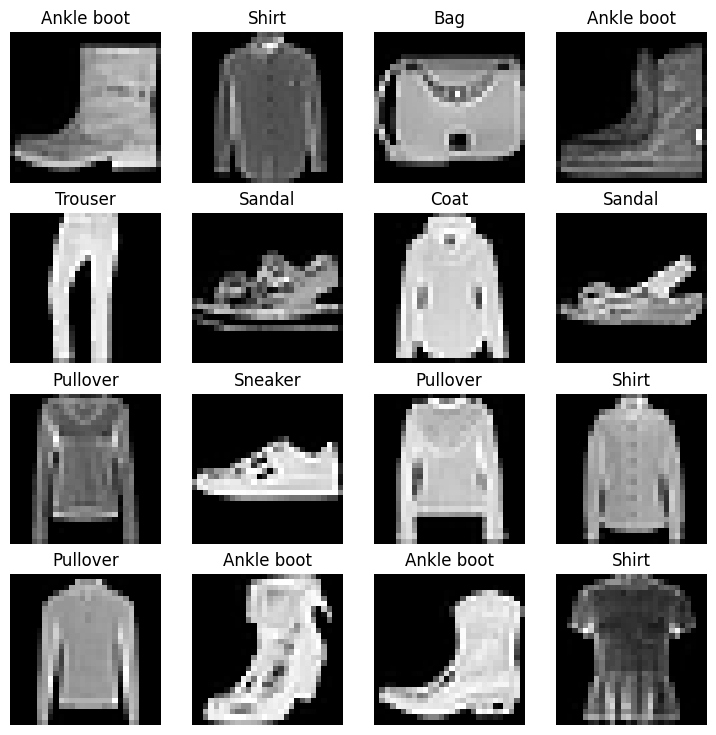

In [15]:
# Plot random images
torch.manual_seed(42)

fig = plt.figure(figsize=(9,9))
rows,cols = 4,4

for i in range(1,17):
    random_idx = torch.randint(0,len(training_data),size=[1]).item()
    img, label = training_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

In [12]:
training_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test)

## 2. Prepare DataLoader

Right noe, our data is in the form of Pytorch DAtasets

DataLoader turns our datasets into a Python iterable.

More specifically, we want to turn our data into batches (or minibatches). Here batches mean a set of items.

Why ?

1. It is more computationally efficient,as in your computing harware may not be able to look at 60000 images in one hit. So we break down it to 32 images at a time (batch size of 32)
2. It gices our neural network more chances to update its gradients per epoch.



In [22]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter

BATCH_SIZE = 32

# Turn datasets into iterables (batchees)
train_dataloader = DataLoader(dataset= training_data,
                             batch_size= BATCH_SIZE,
                              shuffle= True
                             )

test_dataloader = DataLoader(dataset = test_data,
                            batch_size=BATCH_SIZE,
                             shuffle=False
                            )

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x15a868708c0>,
 <torch.utils.data.dataloader.DataLoader at 0x15a86873a10>)

In [24]:
# Lets checkout what we have created

print(f"DataLoaders: {train_dataloader,test_dataLoader}")
print(f"Length of train_datalaoder: {len(train_dataloader)}") # 60000 / 32 datasets divinde by batchsize
print(f"Length of test_datalaoder: {len(test_dataloader)}") # 10000/32


DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000015A868708C0>, <torch.utils.data.dataloader.DataLoader object at 0x0000015A84C11970>)
Length of train_datalaoder: 1875
Length of test_datalaoder: 313


In [20]:
train_dataloader.dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [26]:
# Checkout whats inside the training dataloader
train_feature_batch, train_labels_batch = next(iter(train_dataloader))
train_feature_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size : <built-in method size of Tensor object at 0x0000015A8E1119A0>
Label: 7 | label size: torch.Size([])


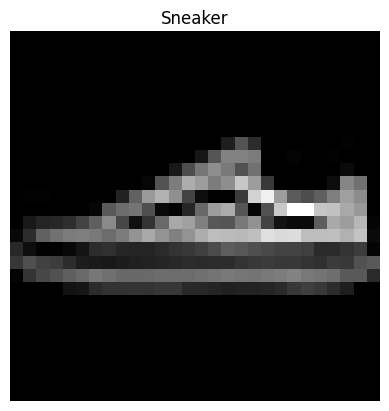

In [38]:
# show a sample
torch.manual_seed(42)
random_idx = torch.randint(0,len(train_feature_batch),size=[1]).item() # This converts the value from a python tensor to a standarad python integer
img, label = train_feature_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size : {img.size}")
print(f"Label: {label} | label size: {label.shape}")

## 3. Model 0: Build a basline model

When starting to build a series of machine learning modelling experiments, its best practise to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments. 

In other words: start simply and add complexity when necessary

In [42]:
# Creating a flatten layer

flatten_model = nn.Flatten()

#  GEt a single sample 
x = train_feature_batch[0]

# flattern the sample
output = flatten_model(x) # perform forward pass 

# print
print(f"Shape before flattening: {x.shape} | Shape after flatenning: {output.shape}")
# x.shape -> ([color channels, height, width])
# output.shape -> ([colro channels, height * width])

Shape before flattening: torch.Size([1, 28, 28]) | Shape after flatenning: torch.Size([1, 784])


The reson for the flattenning is we are trying to condense information into a single vector space
`Example -> tesla car video`
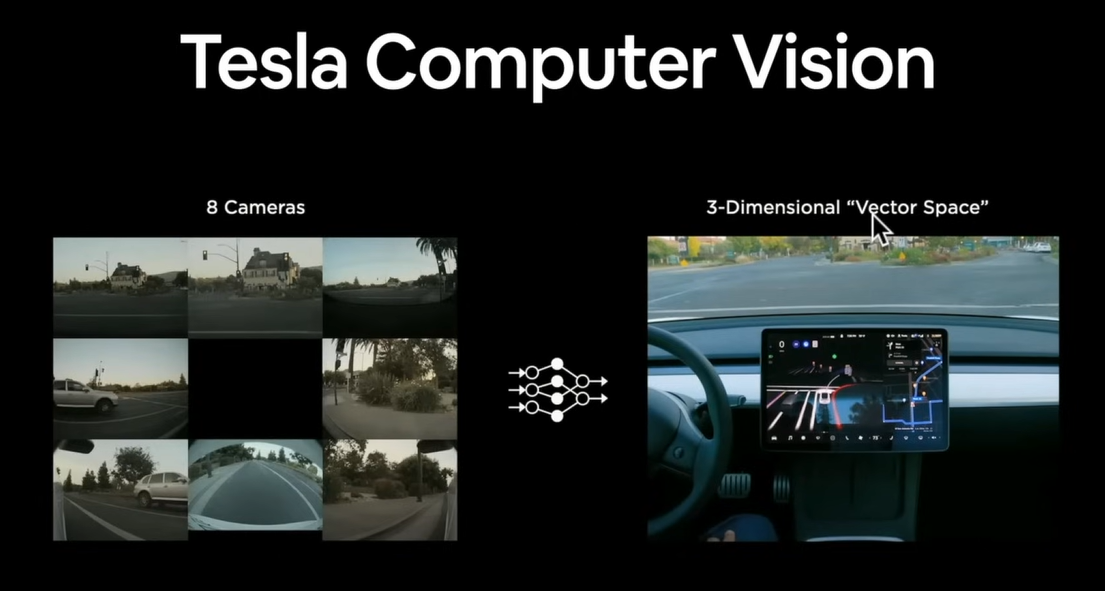


also we flattern the data because we are going to build a base model using the linear model and the linear layer cannot handle multi dimensional data like this `x.shape -> [1, 28 , 28]` so we want it to have a single vector as input like this `output.shape -> [1 , 784]`

In [50]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                input_shape: int,
                output_shape: int,
                 hidden_shape: int
                ):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_shape),
            nn.Linear(in_features=hidden_shape,
                      out_features=output_shape)
        )

    def forward(self,x):
        return self.layer_stack(x)

In [51]:
torch.manual_seed(42)

# setup model withinput parametsrs

model_0 = FashionMNISTModelV0(
    input_shape=784, # this is 28 * 28
    hidden_shape= 10,
    output_shape= len(class_names) # one for every class
)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [54]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.1747,  0.2848,  0.0754, -0.1747,  0.4594,  0.1398,  0.4141,  0.2572,
         -0.2044, -0.0451]], grad_fn=<AddmmBackward0>)